# Recommendation Systems:

Basic example of recommendation system is seen in ecommerce websites like flipkart, amazon wherein if we buy a certain product like lets say phone, we will get recommendation to buy headphones. Also netflix we watch certain movie and we will get recommendation for some other movies which we may like or any similar movie watched earlier.

Two techniques basically used in recommendation system are-

1. Content based filtering - Lets say a user watches a movie, then based on the year, generes,topic, actors and directors similar movie will be recommended to him/her. Ex. Amazon

2. collaborative filtering- We tend to find similar users and recommned what similar users. As the word collaborative filtering says collaborative means in a group we find what the users and classify the users into clusters of similar types.  We see the behaviour of the user respective to the other user. Lets say user 1 has watched movie1, movie2, movie3 and movie4 and has given ratings like 4,5,3 and 1. Also user 2 has watched movie1, movie2, movie3 and movie4 and has given ratings 5,4,3 then we assume that user 2 also might rate the 4th movie as 1. So based on this we recommend the movies.

# Cosine Similarity and Cosine Distance:
This is widely used in recommendation systems and these two terms are inversely proportional i.e as cosine similarity increases, the cosine distance decreases and viceversa.
### Formula : Cosine Similarity= 1- Cosine Distance 
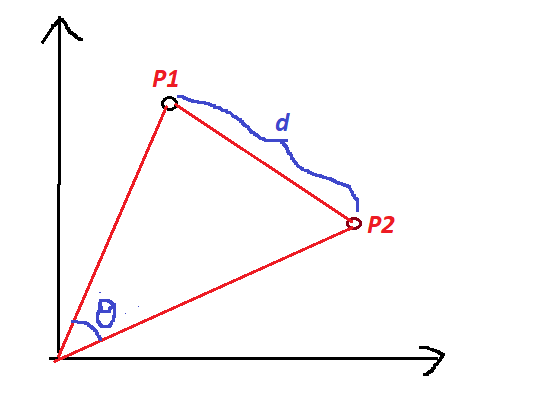
Let's say we have two points P1 and P2, we calculate the distance between these two points using the Eucleidian distance i.e. (x2-x1)square + (y2-y1)square= d. So if we want to find out the cosine similarity we have to basically find teeta.


### Cosine similarity= cos(angle between P1 and P2)
And this cosine similarity ranges between -1 to +1. If teeta value is 45 degree then the cosine similarity is cos(45)=0.53.
This means that P1 and P2 is 53% similar.
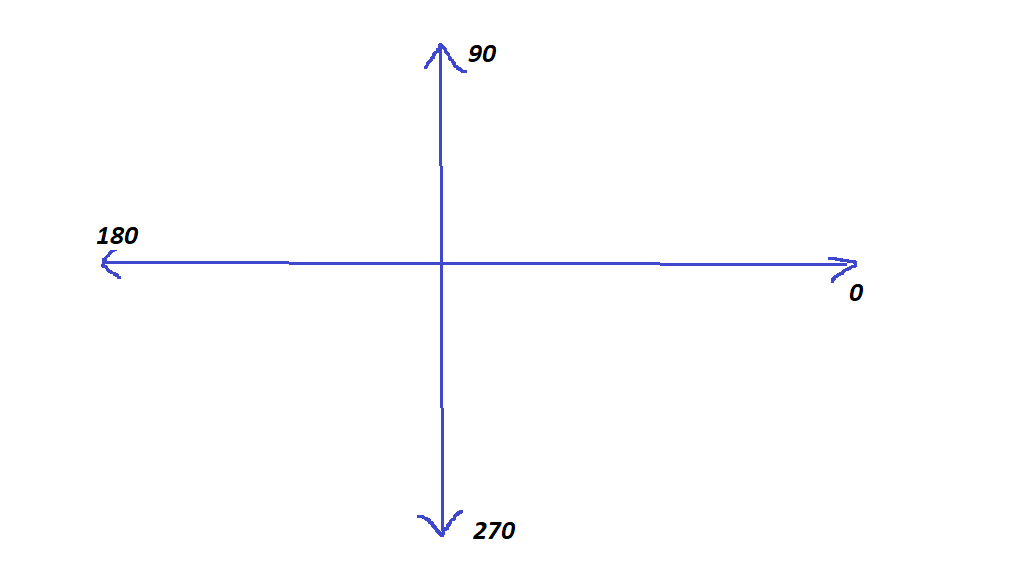
We can see here that the cosine value changes through different quadrants. Lets say two points lie on the same axis then the cosine value is cos(0) which is 1 and in this case the distance between the two points is the least so it has the highest cosine similarity which is 1 and as we go towards the second quadrant the value becomes -1, the third quadrant the value approaches to 0 and in 4th quadrant the value again becomes 0.
cos(0)=1
cos(90)=0
cos(180)=-1
cos(270)=0
cos(360)=1



# Cosine simialrity and cosine distance
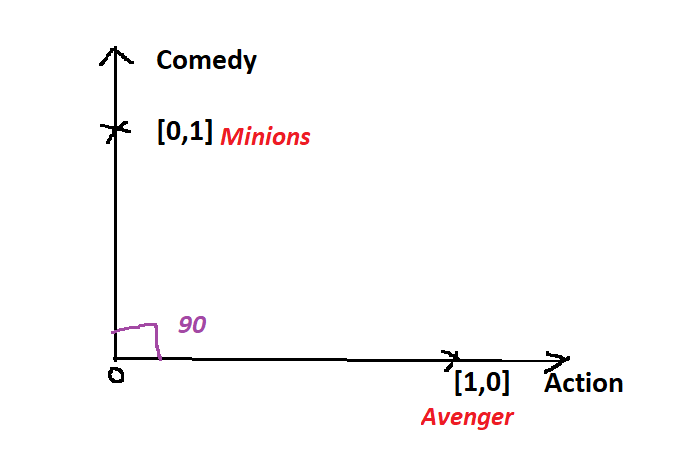

In the above example lets say a person watches some action movie avenger and its on the action scale and not on the comedy scale and minion is on the comdey scale.Now the angle between these two is 90 and cos(90) is 0. So there is no similarity between Avenger and minion. Hence a person that watches avenger will not get minions recommendation.

# Average Weighted Recommendation:

In [2]:
import pandas as pd
import numpy as np

In [3]:
credits= pd.read_csv('tmdb_5000_credits.csv')
movies_df=pd.read_csv('tmdb_5000_movies.csv')

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
credits_renamed=credits.rename(index=str,columns={'movie_id':'id'})
movies_df_merge=movies_df.merge(credits_renamed,on='id')
movies_df_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:

movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

## Using Weighted average for each movie's Average Rating:
### W=(Rv+Cm)/(v+m)
            
            W= Weighted Rating
            R=average movie rating
            v=no. of votes
            C=The mean vote across the whole report
            m=minimum votes required to be listed in the top 250(or any no. for that matter)

In [14]:
R=movies_cleaned_df['vote_average']
v=movies_cleaned_df['vote_count']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)

In [15]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [16]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276075
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509565
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098319


In [22]:
movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)

In [24]:
weight_average=movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

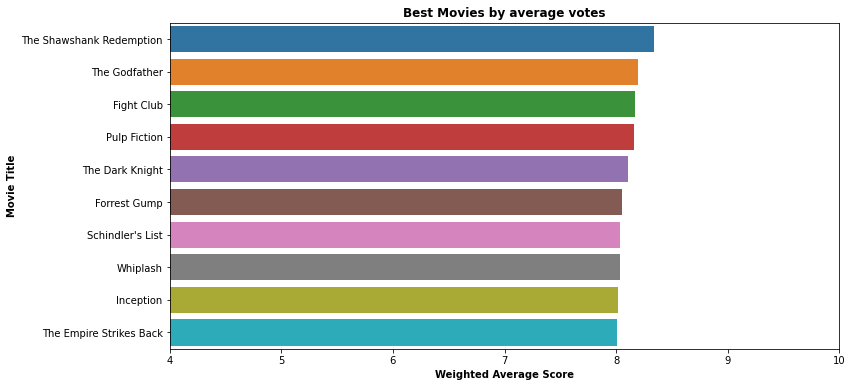

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4,10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

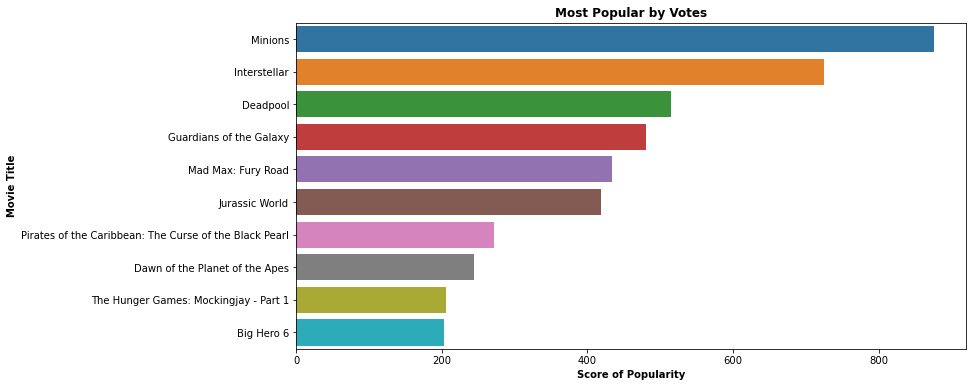

In [26]:
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [28]:
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [29]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


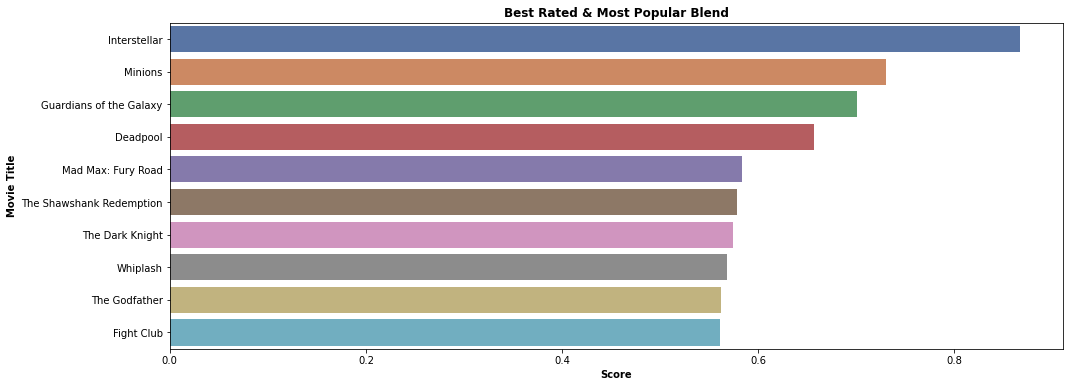

In [30]:
scored_df = movies_cleaned_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')

# KNN item based Collaborative Fitering using Cosine Similarity:
## Movie recommendation:

In [31]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [32]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [33]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [52]:
df_merge = pd.merge(rating_df,movies_df,on='movieId')
df_merge.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


### Let's filter only the popular movies based on the total rating count

In [75]:
df_totrating_count=df_merge.groupby(['title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']]
df_merge_tot=df_totrating_count.merge(df_merge,on='title')

In [76]:
popularity_threshold=50
df_popularity=df_merge_tot.query('totalRatingCount>=@popularity_threshold')

In [77]:
df_popularity.sort_values(by='totalRatingCount',ascending=False)

,title,totalRatingCount,userId,movieId,rating
33602,Forrest Gump (1994),329,564,356,3.0
33450,Forrest Gump (1994),329,275,356,3.0
33444,Forrest Gump (1994),329,261,356,5.0
33445,Forrest Gump (1994),329,263,356,4.0
33446,Forrest Gump (1994),329,264,356,3.5
...,...,...,...,...,...
76721,Scary Movie (2000),50,333,3785,3.0
76720,Scary Movie (2000),50,327,3785,5.0
76719,Scary Movie (2000),50,307,3785,1.5
76718,Scary Movie (2000),50,298,3785,2.0


In [112]:
#Creating a pivot matrix
movie_features_df=df_popularity.pivot_table(index='title',columns='userId',values='rating').fillna(0)
(movie_features_df).head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [80]:
movie_features_df.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]], dtype=float32)

In [81]:
from scipy.sparse import csr_matrix
df_mat=csr_matrix(movie_features_df.values)

In [82]:
df_mat

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.neighbors import NearestNeighbors
model_knn= NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(df_mat)

NearestNeighbors(algorithm='brute', metric='cosine')

In [96]:
query_index=np.random.choice(movie_features_df.shape[0])
print(query_index)

414


In [99]:
distance,indices=model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 7)

In [100]:
distance

array([[0.        , 0.4333111 , 0.5267682 , 0.5270072 , 0.53523433,
        0.535905  , 0.5464927 ]], dtype=float32)

In [101]:
indices

array([[414, 328, 407, 381, 313,  58, 309]], dtype=int64)

In [ ]:
distance.flatten()

In [105]:
type(movie_features_df.iloc[query_index,:].values)

numpy.ndarray

In [124]:
for i in range(len(distance.flatten())):
    if(i==0):
        print('Recommendations for {0} is:'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1} with distance of {2}'.format(i,movie_features_df.index[indices.flatten()[i]],distance.flatten()[i]))

Recommendations for Tron (1982) is:
1: RoboCop (1987) with distance of 0.4333111047744751
2: Total Recall (1990) with distance of 0.5267682075500488
3: Star Wars: Episode I - The Phantom Menace (1999) with distance of 0.5270072221755981
4: Predator (1987) with distance of 0.5352343320846558
5: Blade (1998) with distance of 0.5359050035476685
6: Planet of the Apes (1968) with distance of 0.5464926958084106


# Book Recommendation system using Peason Correlation:
This used in google book recommendation systems or any famous ecommerce wiebsites like Amazon, Flipkart eltc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the dataset with all the necessary features.

In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\IPython\core\interacti

In [4]:
print(ratings.shape)

(1149780, 3)


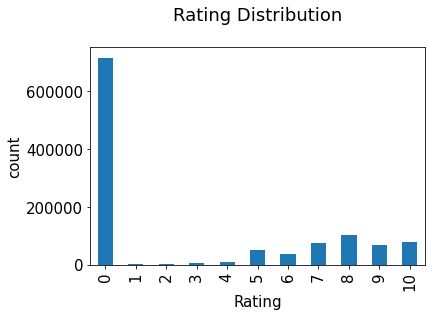

In [5]:
plt.rc('font',size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar') ##Value counts will take the count of each unique value in the 
##feature bookRating of fratings Dataframe, sort=False will not sort the values and plots the graph as it it. We are
##using bar plot for this visualisation.
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [6]:
print(users.shape)

(278858, 3)


In [7]:
print(books.shape)

(271360, 8)


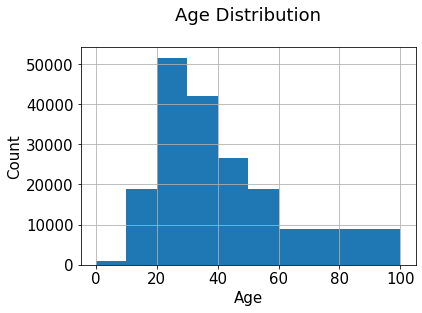

In [8]:
users.Age.hist(bins=[0,10,20,30,40,50,60,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')
plt.show()

## People between age group 20 and 40 have given the most ratings.

    We use Pearson's R correlation coefficient to measure the correlation between two variables ie. ratings for two books.
    We create two two columns from the ratings dataframe, one to find the mean of each unique value and the other one to find the count of each unique rating.

In [9]:
average_rating= pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [10]:
average_rating['total_Rating_count']= pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.head()

,bookRating,total_Rating_count
ISBN,,
0330299891,3.0,2
0375404120,1.5,2
0586045007,0.0,1
9022906116,3.5,2
9032803328,0.0,1


In [11]:
average_rating.sort_values(by='total_Rating_count',ascending=False)

,bookRating,total_Rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


### From the above analysis we see that the book which was rated the highest doesn't have a very good rating. So we need to have a better system.

## To ensure statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded.

In [12]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [13]:
ratings.shape

(1149780, 3)

In [14]:
counts1= ratings['userID'].value_counts()
counts2=ratings['bookRating'].value_counts()
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]
ratings=ratings[ratings['bookRating'].isin(counts2[counts2>=100].index)]

In [16]:
ratings

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


## Matrix Rating
The ratings table is converted to a 2D matrix. The matrix will be sparse because not every book is rated by every User ID.

In [27]:
ratings_pivot=ratings.pivot(index='userID',columns='ISBN',values='bookRating')
userID=ratings_pivot.index
ISBN=ratings_pivot.columns
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings_pivot.index[0]

254

In [20]:
ratings_pivot.columns[0]

' 0330299891'

### Let's the correlation scores for some random ISBN no.

In [48]:
bones_ratings = ratings_pivot['0375404120']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['total_Rating_count'])
corr_summary[corr_summary['total_Rating_count']>=100].sort_values('pearsonR', ascending=False).head(10)

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,total_Rating_count
ISBN,,
034538475X,1.0,193
0385722206,1.0,283
0440211727,1.0,517
0440498058,1.0,158
0440998050,1.0,156
0671003755,1.0,446
0345380371,0.5,257
0670892963,0.5,131
0316666343,0.5,1295
